#### STAT 504 HW3
##### V.A. Suchar
##### 12/09/2015

> Data Set 2 source: www.webpages.uidaho.edu/~stevel/504/reviews_Musical_Instruments.json

> 1. Read data in dataframes

In [1]:
import pandas as pd
import numpy as np
# ERIC json import code (THANKS!!!):
import urllib
import json

urllib.urlretrieve('http://www.webpages.uidaho.edu/erichs/music.json', 'C:/Users/vasiles/OneDrive/STAT 504 Python/hw3/music.json')

with open('C:/Users/vasiles/OneDrive/STAT 504 Python/hw3/music.json', 'rU') as f:
    data = [json.loads(row) for row in f]
    df2 = pd.DataFrame(data)

df15=df2[(df2.overall==1)|(df2.overall==5)]

# Transform 1 star to 0 and 5 star to 1 and add it as rating
rating=np.where(df15.overall==5, 1, 0)
df15.loc[:,'rating']=pd.Series(rating, index=df15.index)
print df15.head()


C:\Users\vasiles\AppData\Local\Continuum\Anaconda\lib\site-packages\pandas\core\indexing.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\vasiles\AppData\Local\Continuum\Anaconda\lib\site-packages\pandas\core\indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


         asin helpful  overall  \
1  0014072149  [0, 0]        5   
2  0041291905  [0, 0]        5   
3  0041913574  [0, 0]        5   
4  0201891859  [0, 1]        1   
5  0577088726  [0, 0]        5   

                                          reviewText   reviewTime  \
1  If you are a serious violin student on a budge...   06 6, 2013   
2  This is and excellent edition and perfectly tr...  10 14, 2013   
3  Perfect for someone who is an opera fan or a w...  09 23, 2010   
4  How many Nocturnes does it contain? All of the...  10 17, 2012   
5  this was written for Carin Levine in 2008, but...  06 14, 2013   

       reviewerID           reviewerName                           summary  \
1  A3TS466QBAWB9D          Silver Pencil  Perform it with a friend, today!   
2  A3BUDYITWUSIS7  joyce gabriel cornett           Vivalldi's Four Seasons   
3  A19K10Z0D2NTZK            TexasCowboy   Full score: voice and orchestra   
4  A14X336IB4JD89                 dfjm53      Unable to determine co

> Use a random seed 1234567, split the new DataFrame into training and testing sets, using the review text as the feature and the star rating as the response variable

In [2]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df15.reviewText, df15.rating, random_state=1234567)

print X_train.shape
print X_test.shape

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=100)
train_dtm = vectorizer.fit_transform(X_train)
test_dtm = vectorizer.transform(X_test)

print train_dtm.shape
print test_dtm.shape

X = train_dtm
y = y_train
X_test=test_dtm

(98970L,)
(32990L,)
(98970, 100)
(32990, 100)


> 1. Naive Bayes

In [9]:
import time
# measure process time
t0 = time.clock()

from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
X = train_dtm
y = y_train
X_test=test_dtm
nb.fit(X, y)
nb_pred_rating = nb.predict(X) # class predictions
nb_pred_prob = nb.predict_proba(X)[:, 1]
# rating 5 is col 0 rating 1 is col 1
y_pred_rating=nb.predict(X_test)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_rating)
# 10 fold cross-validation
from sklearn.cross_validation import cross_val_score
nb_10cv_auc = cross_val_score(nb, X, y, cv=10, scoring='accuracy')
print nb_10cv_auc
nb_10cv_auc.mean()

print time.clock() - t0, "seconds process time"
nb_time=time.clock() - t0




0.906698999697
[ 0.90573853  0.90705193  0.90977975  0.90866842  0.90906335  0.90380924
  0.90369846  0.90683104  0.90895311  0.90400162]
1.01354987617 seconds process time


> 2. KNN

In [11]:
# measure process time
t0 = time.clock()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
X = train_dtm
y = y_train
X_test=test_dtm
knn.fit(X, y)
knn_pred_rating = knn.predict(X) # class predictions
knn_pred_prob = knn.predict_proba(X)[:, 1]

y_pred_rating=knn.predict(X_test)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_rating)
# 10 fold cross-validation
from sklearn.cross_validation import cross_val_score
knn_10cv_auc = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print knn_10cv_auc
print knn_10cv_auc.mean()

print time.clock() - t0, "seconds process time"
knn_time=time.clock() - t0

MemoryError: 

> 3. Logistic Regression

In [10]:
t0 = time.clock()

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
X = train_dtm
y = y_train
X_test=test_dtm
logreg.fit(X, y)
lg_pred_rating = logreg.predict(X) # class predictions

# store the predicted probabilites of class 1
lg_pred_prob = logreg.predict_proba(X)[:, 1]

y_pred_rating=logreg.predict(X_test)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_rating)
# 10 fold cross-validation
from sklearn.cross_validation import cross_val_score
lg_10cv_auc = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print lg_10cv_auc
print lg_10cv_auc.mean()


print time.clock() - t0, "seconds process time"
lg_time=time.clock() - t0

0.921370112155
[ 0.9165488   0.91806426  0.92200445  0.92038796  0.91866222  0.91947055
  0.91693614  0.91915926  0.92027082  0.91814875]
0.918965317869
12.0785664607 seconds process time


> 4. SVM Polynomial

In [13]:
t0 = time.clock()

from sklearn import svm
svmp = svm.SVC(kernel='poly', C = 1.0, degree=3)
X = train_dtm
y = y_train
X_test=test_dtm
svmp.fit(X,y)
from sklearn.cross_validation import cross_val_score
svmp_10cv_auc = cross_val_score(svmp, X, y, cv=10, scoring='accuracy')
print svmp_10cv_auc
print svmp_10cv_auc.mean()


print time.clock() - t0, "seconds process time"
svmp_time=time.clock() - t0

[ 0.90725399  0.90887048  0.91149727  0.91079006  0.90876023  0.9096696
  0.90854891  0.90885206  0.90864996  0.90966047]
0.909255302613
25855.3042958 seconds process time


> 5. SVM Gaussian

In [ ]:
# measure process time
t0 = time.clock()

from sklearn import svm
svmg = svm.SVC(kernel='rbf', C = 1.0, gamma=1)
X = train_dtm
y = y_train
X_test=test_dtm
svmg.fit(X,y)
from sklearn.cross_validation import cross_val_score
svmg_10cv_auc = cross_val_score(svmg, X, y, cv=10, scoring='accuracy')
print svmg_10cv_auc
print svmg_10cv_auc.mean()


print time.clock() - t0, "seconds process time"
svmg_time=time.clock() - t0

> 6. Tree

In [3]:
import time
# measure process time
t0 = time.clock()

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3, random_state=1)
X = train_dtm
y = y_train
X_test=test_dtm
tree.fit(X,y)
from sklearn.cross_validation import cross_val_score
tree_10cv_auc = cross_val_score(tree, X, y, cv=10, scoring='accuracy')
print tree_10cv_auc
print tree_10cv_auc.mean()


print time.clock() - t0, "seconds process time"
tree_time=time.clock() - t0

[ 0.90674884  0.90674884  0.90674884  0.90674884  0.90684046  0.90684046
  0.90683104  0.90683104  0.90683104  0.90683104]
0.906800043739
4.12984993619 seconds process time


> 7. Bagging

In [4]:
# measure process time
t0 = time.clock()

from sklearn.ensemble import BaggingClassifier
bag=BaggingClassifier(tree,n_estimators=10, random_state=1)
X = train_dtm
y = y_train
X_test=test_dtm
bag.fit(X,y)
from sklearn.cross_validation import cross_val_score
bag_10cv_auc = cross_val_score(bag, X, y, cv=10, scoring='accuracy')
print bag_10cv_auc
print bag_10cv_auc.mean()


print time.clock() - t0, "seconds process time"
bag_time=time.clock() - t0

[ 0.90674884  0.90674884  0.90674884  0.90674884  0.90684046  0.90684046
  0.90683104  0.90683104  0.90683104  0.90683104]
0.906800043739
31.0769713988 seconds process time


> 8. Random Forest 

In [5]:
# measure process time
t0 = time.clock()

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=1)
X = train_dtm
y = y_train
X_test=test_dtm
rf.fit(X,y)
from sklearn.cross_validation import cross_val_score
rf_10cv_auc = cross_val_score(rf, X, y, cv=10, scoring='accuracy')
print rf_10cv_auc
print rf_10cv_auc.mean()


print time.clock() - t0, "seconds process time"
rf_time=time.clock() - t0

[ 0.90977975  0.91230552  0.91270964  0.913922    0.90956856  0.91462059
  0.91026677  0.91299515  0.91137833  0.91188359]
0.911942990875
166.15334148 seconds process time


> 9. Noisy replication : STILL NOT WORKING

In [ ]:
# set a seed for reproducibility
np.random.seed(1234567)
# create five bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=16029, size=16029, replace=True) for _ in range(1, 6)]
samples
X_train.iloc[samples[0],:]

from sklearn.tree import DecisionTreeClassifier
tree2 = DecisionTreeClassifier(max_depth=3, random_state=1)
# list for storing predicted price from each tree
predictions = []
# grow one tree for each bootstrap sample and make predictions on testing data
for sample in samples:
    X_train_new = X_train.iloc[sample[0],:]
    y_train_new = y_train.iloc[sample[0]]
    tree2.fit(X_train_new, y_train_new)
    y_pred = tree2.predict(X_test)
    predictions.append(y_pred)

# convert predictions from list to NumPy array
predictions = np.array(predictions)
predictions

# INCOMPLETE?NOT WORKING!!!!!!!!!!!

> 10. AdaBoost classifier
>
> An AdaBoost classifier is a meta-estimator that begins by fitting a classifier
> on the original dataset and then fits additional copies of the classifier on 
> the same dataset but where the weights of incorrectly classified instances are 
> adjusted such that subsequent classifiers focus more on difficult cases
> measure process time

In [6]:
t0 = time.clock()

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=10, random_state=1)
X = train_dtm
y = y_train
X_test=test_dtm
ada.fit(X,y)
from sklearn.cross_validation import cross_val_score
ada_10cv_auc = cross_val_score(ada, X, y, cv=10, scoring='accuracy')
print ada_10cv_auc
print ada_10cv_auc.mean()


print time.clock() - t0, "seconds process time"
ada_time=time.clock() - t0

[ 0.9082643   0.90897151  0.90957769  0.90856739  0.90896231  0.90987168
  0.90945837  0.90844786  0.90844786  0.90945837]
0.90900273246
16.5270943188 seconds process time


> PLOTS

In [13]:
t0 = time.clock()

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

X = train_dtm
y = y_train
X_test=test_dtm

# NB:
y_pred_prob = nb.predict_proba(X_test)[:, 1]
nb_auc=metrics.roc_auc_score(y_test, y_pred_prob)
#print metrics.roc_auc_score(y_test, y_pred_prob)
nb_fpr, nb_tpr, nb_thresholds = metrics.roc_curve(y_test, y_pred_prob)
# KNN: ERROR!!!!!
#y_pred_prob = knn.predict_proba(X_test)[:, 1]
#knn_auc=metrics.roc_auc_score(y_test, y_pred_prob)
#print metrics.roc_auc_score(y_test, y_pred_prob)
knn_fpr, knn_tpr, knn_thresholds = metrics.roc_curve(y_test, y_pred_prob)
# LG:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
logreg_auc=metrics.roc_auc_score(y_test, y_pred_prob)
#print metrics.roc_auc_score(y_test, y_pred_prob)
lg_fpr, lg_tpr, lg_thresholds = metrics.roc_curve(y_test, y_pred_prob)
#TREE:
y_pred_prob = tree.predict_proba(X_test)[:, 1]
tree_auc=metrics.roc_auc_score(y_test, y_pred_prob)
#print metrics.roc_auc_score(y_test, y_pred_prob)
tree_fpr, tree_tpr, tree_thresholds = metrics.roc_curve(y_test, y_pred_prob)
# BAG:
y_pred_prob = bag.predict_proba(X_test)[:, 1]
bag_auc=metrics.roc_auc_score(y_test, y_pred_prob)
#print metrics.roc_auc_score(y_test, y_pred_prob)
bag_fpr, bag_tpr, bag_thresholds = metrics.roc_curve(y_test, y_pred_prob)
# RF:
y_pred_prob = rf.predict_proba(X_test)[:, 1]
rf_auc=metrics.roc_auc_score(y_test, y_pred_prob)
#print metrics.roc_auc_score(y_test, y_pred_prob)
rf_fpr, rf_tpr, rf_thresholds = metrics.roc_curve(y_test, y_pred_prob)
# ADA:
y_pred_prob = ada.predict_proba(X_test)[:, 1]
ada_auc=metrics.roc_auc_score(y_test, y_pred_prob)
#print metrics.roc_auc_score(y_test, y_pred_prob)
ada_fpr, ada_tpr, ada_thresholds = metrics.roc_curve(y_test, y_pred_prob)

print time.clock() - t0, "seconds process time"
plot_time=time.clock() - t0

0.410918929558 seconds process time


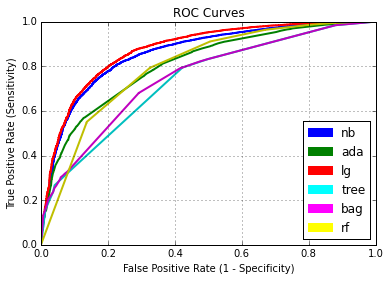

In [15]:
# NOTE : replaced knnwith ada in the original code since knn is not working
%matplotlib inline
plt.plot(nb_fpr, nb_tpr, ada_fpr, ada_tpr, lg_fpr, lg_tpr, tree_fpr, tree_tpr, bag_fpr, bag_tpr, rf_fpr, rf_tpr, linewidth=2.0)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curves')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
nb = mpatches.Patch(color='blue', label='nb')
ada= mpatches.Patch(color='green', label='ada')
lg = mpatches.Patch(color='red', label='lg')
tree = mpatches.Patch(color='cyan', label='tree')
bag = mpatches.Patch(color='magenta', label='bag')
rf = mpatches.Patch(color='yellow', label='rf')
#ada= mpatches.Patch(color='black', label='ada')
plt.legend(handles=[nb,ada,lg,tree,bag,rf], loc=4)
plt.grid(True)

> Tabulate the 10cv_auc.means

In [18]:
print 'NB 10CV AUC.mean & process time'
print nb_10cv_auc.mean()
print nb_time
#print 'KNN 10CV AUC.mean & process time'
#print knn_10cv_auc.mean()
#print knn_time
print 'LG 10CV AUC.mean & process time'
print lg_10cv_auc.mean()
print lg_time
print 'TREE 10CV AUC.mean & process time'
print tree_10cv_auc.mean()
print tree_time
print 'BAG 10CV AUC.mean & process time'
print bag_10cv_auc.mean()
print bag_time
print 'RF 10CV AUC.mean & process time'
print rf_10cv_auc.mean()
print rf_time
print 'SVMP 10CV AUC.mean & process time'
print '0.909255302613'

print '25855.3042958'
#print 'SVMG 10CV AUC.mean & process time'
#print svmg_10cv_auc.mean()
#print svmg_time
print 'ADA 10CV AUC.mean & process time'
print ada_10cv_auc.mean() 
print ada_time

NB 10CV AUC.mean & process time
0.906759545778
1.01360904198
LG 10CV AUC.mean & process time
0.918965317869
12.0786168724
TREE 10CV AUC.mean & process time
0.906800043739
4.1299081964
BAG 10CV AUC.mean & process time
0.906800043739
31.0770299608
RF 10CV AUC.mean & process time
0.911942990875
166.153396419
SVMP 10CV AUC.mean & process time
0.909255302613
25855.3042958
ADA 10CV AUC.mean & process time
0.90900273246
16.5271537864


> Methods are comparable: AUC~90%.
> But there are significant differences when it comes to computation time: SVM taking the longest. KNN gives a memory error. SVM Gaussian is still running....